In [49]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from tools import *
import seaborn

In [114]:
from math import log,exp

class tree:
    def __init__(self):
        self.p = -1 # splitting value
        self.d = -1
        self.val = [1,1]
    
    def fit(self,data,labels,weight):
        # minimisation (quadratique)
        min_split = float('inf')

        for d in range(data.shape[1]):
            for p in range(data.shape[0]):
                left = []
                right = []
                for q in range(data.shape[0]):
                    if data[q,d] < data[p,d]:
                        left.append(q)
                    else:
                        right.append(q)
                
                # calcul impureté
                n_left = np.sum(weight[left])
                n_right = np.sum(weight[right])
                p_left = (labels[left]==1).dot(weight[left])/n_left
                p_right = (labels[right]==1).dot(weight[right])/n_right
                Qm = n_left*p_left*(1-p_left) + n_right*p_right*(1-p_right)
                
                if Qm < min_split:
                    min_split = Qm
                    self.p = data[p,d]
                    self.d = d
                    self.val = [-1,-1]
                    if p_left >= 0.5:
                        self.val[0] = 1
                    if p_right >= 0.5:
                        self.val[1] = 1
    
    def predict(self,p):
        if p[self.d] < self.p:
            return self.val[0]
        return self.val[1]

class Adaboost:
    def __init__(self,n):
        self.weight = np.ones(n)/n
        self.population = 0
        self.alpha = []
        self.classifiers = []
        
    def add_tree(self,data,labels):
        # fit a classifier
        self.population += 1
        t = tree()
        t.fit(data, labels, self.weight)
        
        # compute classification error
        err = 1e-9
        for i in range(data.shape[0]):
            err += self.weight[i]*(t.predict(data[i]) != labels[i])
        
        print(err)
        
        # compute weight of the tree
        al = log((1-err)/err)
        self.classifiers.append(t)
        self.alpha.append(al)
        
        # update weigth of the data
        total_weight = 0
        for i in range(len(self.weight)):
            self.weight[i] *= exp(al*(t.predict(data[i]) != labels[i]))
            total_weight += self.weight[i]
        for i in range(len(self.weight)):
            self.weight[i] /= total_weight
        
    def predict(self,p):
        pred = 0
        for i in range(self.population):
            pred += self.alpha[i]*self.classifiers[i].predict(p)
        if pred >= 0:
            return 1
        return -1
    
    def predict_vector(self,v):
        y = np.zeros(v.shape[0])
        for i in range(len(y)):
            y[i] = self.predict(v[i])
        return y
    
    def score(self,data,labels):
        s = 0
        for i in range(data.shape[0]):
            s += int(self.predict(data[i]) == labels[i])
        return float(s)/data.shape[0]

0
0.180000001
1
0.240853660352
2
0.329317270215
3
0.37275449192
4
0.398568019981
5
0.36073437895
6
0.394950121286
7
0.384328880616
8
0.44216237317
9
0.448159084408
10
0.453029112256
11
0.457062717031
12
0.453474988598
13
0.408552083837
14
0.425075585329
15
0.465768638271
16
0.460386390705
17
0.463294468061
18
0.465804775977
19
0.467993701223
20
0.467298659386
21
0.469306121467
22
0.469675749242
23
0.471409707743
24
0.470879395644
25
0.414582292188
26
0.470956639133
27
0.468634392131
28
0.47048585072
29
0.472130915476
30
0.418274333619
31
0.478429332522
32
0.473866251982
33
0.458645597322
34
0.447316712283
35
0.476134144515
36
0.477221405871
37
0.476799454152
38
0.477828247752
39
0.478123894576
40
0.479040901555
41
0.478691514731
42
0.446262179354
43
0.454030462194
44
0.432627417994
45
0.455369113018
46
0.448499386092
47
0.45330865242
48
0.481719992087
49
0.482364737623


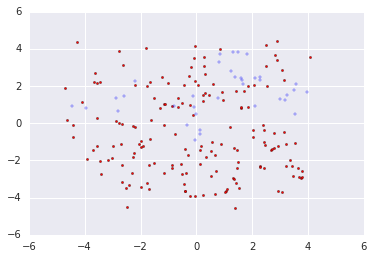

In [130]:
xtrain,ytrain = gen_arti(nbex=200,data_type=4,epsilon=0.5)
xtest,ytest = gen_arti(nbex=200,data_type=4,epsilon=0.5)
n = xtrain.shape[0]
t = tree()
t.fit(xtrain,ytrain,np.ones(n)/n)

ada = Adaboost(xtrain.shape[0])
plot_data(xtrain,ytrain)
for i in range(50):
    print(ada.population)
    ada.add_tree(xtrain,ytrain)


In [134]:
for i in range(100):
    print(ada.population)
    ada.add_tree(xtrain,ytrain)

50
0.482965551626
51
0.482747928197
52
0.483323342065
53
0.483488773091
54
0.484016584748
55
0.483827466709
56
0.484334178802
57
0.484480240572
58
0.457010317952
59
0.460413905368
60
0.484739705092
61
0.484787798023
62
0.457759955569
63
0.462279890161
64
0.485686869847
65
0.485043322995
66
0.485477732774
67
0.485165746641
68
0.467666833029
69
0.438474677731
70
0.467440245171
71
0.436670697101
72
0.420435957786
73
0.435180667334
74
0.464964266018
75
0.485065994089
76
0.485237827283
77
0.485661171857
78
0.485474509835
79
0.442717943908
80
0.417220461641
81
0.432666992966
82
0.44797559125
83
0.431683577697
84
0.439680438895
85
0.416814347819
86
0.438443266481
87
0.461068637899
88
0.48429894467
89
0.484776979695
90
0.48522676623
91
0.460851842983
92
0.464130111375
93
0.485949480533
94
0.486056045578
95
0.46004544117
96
0.463768460985
97
0.486339122219
98
0.486095693839
99
0.48647189181
100
0.486317377275
101
0.486681832258
102
0.486662951841
103
0.487009462736
104
0.486790730391
105
0.4871

(-0.5, 49.5, 49.5, -0.5)

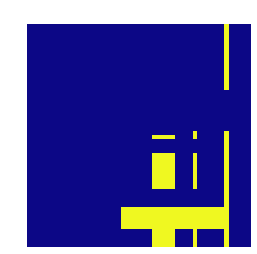

In [135]:
grid,x,y = make_grid(step=50)
h = np.zeros(len(grid[:,0]))
l = np.shape(x)[0]
x = x.reshape((-1,1))
y = y.reshape((-1,1))
for i in range(len(h)):
    h[i] = ada.predict([x[i],y[i]])
plt.matshow(h.reshape((l,-1)).T,cmap='plasma')
plt.axis('off')

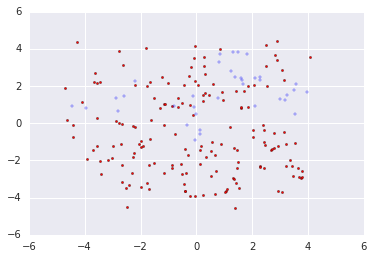

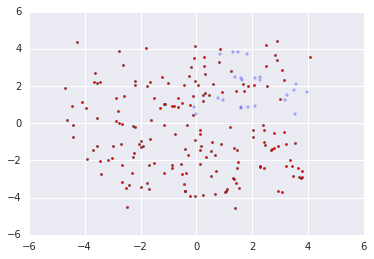

In [136]:
plot_data(xtrain,ytrain)
plt.figure()
plot_data(xtrain,ada.predict_vector(xtrain))

In [137]:
print("Training : {}, test : {}".format(ada.score(xtrain,ytrain),ada.score(xtest,ytest)))

Training : 0.9, test : 0.75
